In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
import matplotlib.pyplot as plt

import glob
import os
import shutil

from tqdm.notebook import tqdm

In [ ]:
%cd /content/drive/MyDrive/digital_gap_final_trash_yolov5/trash-20211202T130403Z-001
!git clone https://github.com/ultralytics/yolov5 # стандартный репозиторий

In [ ]:
#%cd /content/drive/MyDrive/digital_gap_final_trash_yolov5/trash-20211202T130403Z-001/yolov5
%pip install -r requirements.txt

In [ ]:
!pip install pycocotools

# Посмотрим что там за фотки

In [ ]:
import glob,os
lst_img = glob.glob('/content/drive/MyDrive/digital_gap_final_trash_yolov5/trash-20211202T130403Z-001/trash/0/*.png')
lst_txt = glob.glob('/content/drive/MyDrive/digital_gap_final_trash_yolov5/trash-20211202T130403Z-001/trash/0/*.txt')

In [ ]:
def plot_ann_img(img_path, ann_path):
  
  img = cv2.imread(img_path)
  dh, dw, _ = img.shape

  fl = open(ann_path, 'r')
  data = fl.readlines()
  fl.close()

  for dt in data:
      # Split string to float
      _, x, y, w, h = map(float, dt.split(' '))

      l = int((x - w / 2) * dw)
      r = int((x + w / 2) * dw)
      t = int((y - h / 2) * dh)
      b = int((y + h / 2) * dh)
      
      if l < 0:
          l = 0
      if r > dw - 1:
          r = dw - 1
      if t < 0:
          t = 0
      if b > dh - 1:
          b = dh - 1

      cv2.rectangle(img, (l, t), (r, b), (0, 0, 255), 5)

  fig,ax = plt.subplots(figsize=(20,8))    
  ax.axis('off')
  ax.imshow(img)
  plt.show()

In [ ]:
for i,j in zip(lst_img, lst_txt):
  plot_ann_img(i,j)

# Обеденим файлы в одну папку и разобьем на train, val, test

In [ ]:
txt_all_lst = glob.glob("/content/drive/MyDrive/digital_gap_final_trash_yolov5/trash-20211202T130403Z-001/trash/*/*.txt")
png_all_lst = glob.glob("/content/drive/MyDrive/digital_gap_final_trash_yolov5/trash-20211202T130403Z-001/trash/*/*.png")

In [ ]:
for i in tqdm(png_all_lst):
  shutil.copy(i, '/content/drive/MyDrive/digital_gap_final_trash_yolov5/trash-20211202T130403Z-001/tmp/images')

  0%|          | 0/600 [00:00<?, ?it/s]

In [ ]:
for i in tqdm(txt_all_lst):
  shutil.copy(i, '/content/drive/MyDrive/digital_gap_final_trash_yolov5/trash-20211202T130403Z-001/tmp/labels')

  0%|          | 0/600 [00:00<?, ?it/s]

In [ ]:
!pip install split-folders

In [ ]:
import splitfolders
splitfolders.ratio('/content/drive/MyDrive/digital_gap_final_trash_yolov5/trash-20211202T130403Z-001/tmp',
                   output="trash",
                   seed=42, ratio=(.8, 0.1,0.1))

# Тренируем сеть

In [ ]:
%cd /content/drive/MyDrive/digital_gap_final_trash_yolov5/trash-20211202T130403Z-001/yolov5

/content/drive/MyDrive/digital_gap_final_trash_yolov5/trash-20211202T130403Z-001/yolov5


In [ ]:
%ls

CONTRIBUTING.md  exp3/       models/           runs/      tutorial.ipynb
data/            export.py   __pycache__/      setup.cfg  utils/
detect.py        hubconf.py  README.md         taco/      val.py
Dockerfile       LICENSE     requirements.txt  train.py


In [ ]:
%%time
!python train.py --img 320 --batch 4 --epochs 100 --data /content/drive/MyDrive/digital_gap_final_trash_yolov5/trash-20211202T130403Z-001/gap_yolo.yaml --cfg /content/drive/MyDrive/digital_gap_final_trash_yolov5/trash-20211202T130403Z-001/yolov5/models/yolov5s.yaml --weights yolov5s.pt # Нужно правильно прописать для тренировки на нашем датасете

train: weights=yolov5s.pt, cfg=/content/drive/MyDrive/digital_gap_final_trash_yolov5/trash-20211202T130403Z-001/yolov5/models/yolov5s.yaml, data=/content/drive/MyDrive/digital_gap_final_trash_yolov5/trash-20211202T130403Z-001/gap_yolo.yaml, hyp=data/hyps/hyp.scratch.yaml, epochs=100, batch_size=4, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=0, save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 2021-12-2 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_

In [ ]:
!cp /content/drive/MyDrive/digital_gap_final_trash_yolov5/trash-20211202T130403Z-001/yolov5/runs/train/exp7/weights/best.pt /content/drive/MyDrive/digital_gap_final_trash_yolov5/trash-20211202T130403Z-001/best_100_epoch_gpu.pt

In [ ]:
!python detect.py --weights /content/drive/MyDrive/digital_gap_final_trash_yolov5/trash-20211202T130403Z-001/yolov5/runs/train/exp7/weights/best.pt --img 320 --conf 0.4 --source /content/drive/MyDrive/digital_gap_final_trash_yolov5/trash-20211202T130403Z-001/yolov5/taco/train/images/23-11-2021_02-18-54_PM.png

detect: weights=['/content/drive/MyDrive/digital_gap_final_trash_yolov5/trash-20211202T130403Z-001/yolov5/runs/train/exp7/weights/best.pt'], source=/content/drive/MyDrive/digital_gap_final_trash_yolov5/trash-20211202T130403Z-001/yolov5/taco/train/images/23-11-2021_02-18-54_PM.png, imgsz=[320, 320], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 2021-12-2 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

Fusing layers... 
Model Summary: 213 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/drive/MyDrive/digital_gap_final_trash_yolov5/trash-20211202T130403Z-001/yolov5/taco/train/images/23-11-2021_02-18-54_PM.png: 192x320 2 1s, Done. (0.024s)
Speed: 0.4ms pre-process, 23.8m

In [ ]:
!cat /content/drive/MyDrive/digital_gap_final_trash_yolov5/trash-20211202T130403Z-001/yolov5/taco/train/labels/23-11-2021_02-18-54_PM.txt

0 0.4454244791666666 0.607175925925926 0.043973958333333306 0.07103703703703707
1 0.5135703125 0.6118796296296296 0.0437864583333333 0.08044444444444444


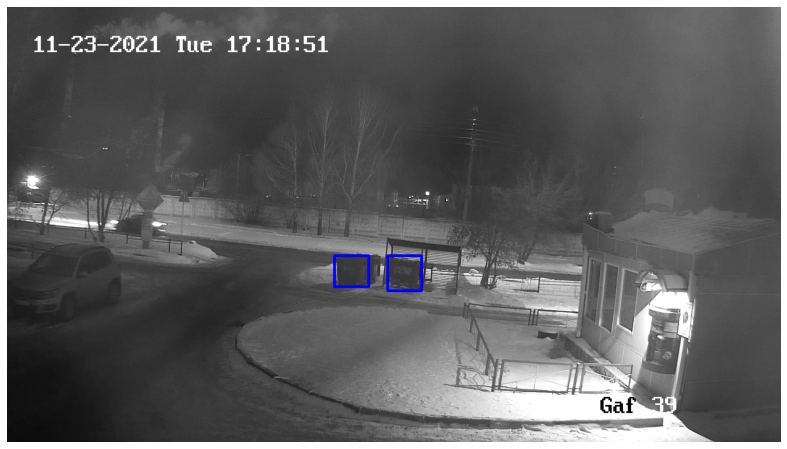

In [ ]:
plot_ann_img('/content/drive/MyDrive/digital_gap_final_trash_yolov5/trash-20211202T130403Z-001/yolov5/taco/train/images/23-11-2021_02-18-54_PM.png',
             '/content/drive/MyDrive/digital_gap_final_trash_yolov5/trash-20211202T130403Z-001/yolov5/taco/train/labels/23-11-2021_02-18-54_PM.txt')

In [ ]:
from IPython.display import Image

In [ ]:
Image('/content/drive/MyDrive/digital_gap_final_trash_yolov5/trash-20211202T130403Z-001/yolov5/runs/detect/exp4/23-11-2021_02-18-54_PM.png')

In [ ]:
!python detect.py --weights /content/drive/MyDrive/digital_gap_final_trash_yolov5/trash-20211202T130403Z-001/yolov5/runs/train/exp7/weights/best.pt --img 320 --conf 0.4 --source /content/drive/MyDrive/digital_gap_final_trash_yolov5/trash-20211202T130403Z-001/yolov5/taco/test/images/23-11-2021_07-58-37_PM.png

detect: weights=['/content/drive/MyDrive/digital_gap_final_trash_yolov5/trash-20211202T130403Z-001/yolov5/runs/train/exp7/weights/best.pt'], source=/content/drive/MyDrive/digital_gap_final_trash_yolov5/trash-20211202T130403Z-001/yolov5/taco/test/images/23-11-2021_07-58-37_PM.png, imgsz=[320, 320], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 2021-12-2 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

Fusing layers... 
Model Summary: 213 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/drive/MyDrive/digital_gap_final_trash_yolov5/trash-20211202T130403Z-001/yolov5/taco/test/images/23-11-2021_07-58-37_PM.png: 192x320 1 0, Done. (0.024s)
Speed: 0.3ms pre-process, 24.0ms i

In [ ]:
!cat /content/drive/MyDrive/digital_gap_final_trash_yolov5/trash-20211202T130403Z-001/yolov5/taco/test/labels/23-11-2021_07-58-37_PM.txt

0 0.34607031250000003 0.5069490740740741 0.07448437499999999 0.11460185185185183


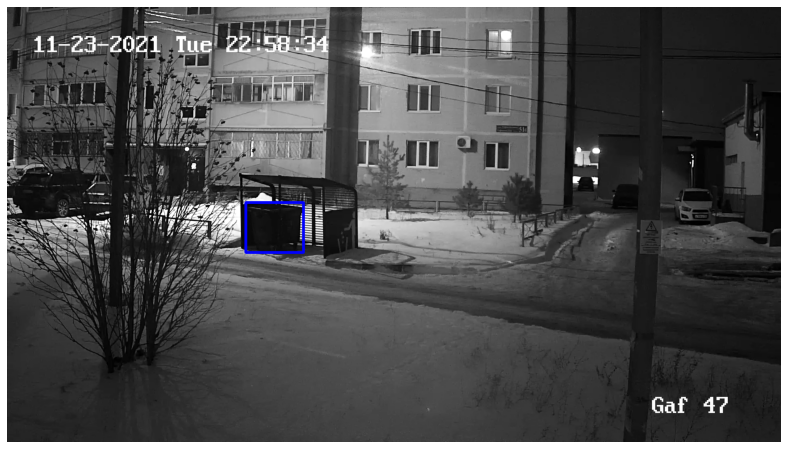

In [ ]:
plot_ann_img('/content/drive/MyDrive/digital_gap_final_trash_yolov5/trash-20211202T130403Z-001/yolov5/taco/test/images/23-11-2021_07-58-37_PM.png',
             '/content/drive/MyDrive/digital_gap_final_trash_yolov5/trash-20211202T130403Z-001/yolov5/taco/test/labels/23-11-2021_07-58-37_PM.txt')

In [ ]:
Image('/content/drive/MyDrive/digital_gap_final_trash_yolov5/trash-20211202T130403Z-001/yolov5/runs/detect/exp6/23-11-2021_07-58-37_PM.png')